In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
df_cine = pd.read_csv('../data/cine.csv')

df_cine

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,date,month,quarter,day
0,1492,304,3900000,26,0,4,4.26,150000.0,26,610.328638,2018-05-05,5,2,5
1,1492,352,3360000,42,0,5,8.08,80000.0,42,519.801980,2018-05-05,5,2,5
2,1492,489,2560000,32,0,4,20.00,80000.0,32,160.000000,2018-05-05,5,2,5
3,1492,429,1200000,12,0,1,11.01,100000.0,12,108.991826,2018-05-05,5,2,5
4,1492,524,1200000,15,0,3,16.67,80000.0,15,89.982004,2018-05-05,5,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142519,1569,495,1320000,22,0,2,3.86,60000.0,22,569.948187,2018-11-04,11,4,4
142520,1569,474,1200000,15,0,1,65.22,80000.0,15,22.999080,2018-11-04,11,4,4
142521,1569,524,1060000,8,0,3,9.20,132500.0,8,86.956522,2018-11-04,11,4,4
142522,1569,529,600000,5,0,2,5.00,120000.0,5,100.000000,2018-11-04,11,4,4


##  Realizar preparación de los datos.
### Limpieza de datos
#### Datos nulos

In [29]:
df_cine.isnull().sum()

film_code         0
cinema_code       0
total_sales       0
tickets_sold      0
tickets_out       0
show_time         0
occu_perc       125
ticket_price      0
ticket_use        0
capacity        125
date              0
month             0
quarter           0
day               0
dtype: int64

Se eliminan los datos nulos en `occu_perc` y `capacity` debido a que son muy pocos y no afectan en el resultado

In [30]:
df_cine.dropna(inplace=True)

In [31]:
df_cine.isnull().sum()

film_code       0
cinema_code     0
total_sales     0
tickets_sold    0
tickets_out     0
show_time       0
occu_perc       0
ticket_price    0
ticket_use      0
capacity        0
date            0
month           0
quarter         0
day             0
dtype: int64

#### Datos duplicados

Se eliminan los datos duplicados que hay en el dataset

In [32]:
df_cine.drop_duplicates(inplace=True)

df_cine

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,date,month,quarter,day
0,1492,304,3900000,26,0,4,4.26,150000.0,26,610.328638,2018-05-05,5,2,5
1,1492,352,3360000,42,0,5,8.08,80000.0,42,519.801980,2018-05-05,5,2,5
2,1492,489,2560000,32,0,4,20.00,80000.0,32,160.000000,2018-05-05,5,2,5
3,1492,429,1200000,12,0,1,11.01,100000.0,12,108.991826,2018-05-05,5,2,5
4,1492,524,1200000,15,0,3,16.67,80000.0,15,89.982004,2018-05-05,5,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142519,1569,495,1320000,22,0,2,3.86,60000.0,22,569.948187,2018-11-04,11,4,4
142520,1569,474,1200000,15,0,1,65.22,80000.0,15,22.999080,2018-11-04,11,4,4
142521,1569,524,1060000,8,0,3,9.20,132500.0,8,86.956522,2018-11-04,11,4,4
142522,1569,529,600000,5,0,2,5.00,120000.0,5,100.000000,2018-11-04,11,4,4


#### Datos anómalos

Función de graficación

In [46]:
def show_graphs(df: pd.DataFrame):
    num_col = [col for col in df.columns if(df[col].dtype in ['int','float'])]

    ncols = 2
    nrows = len(num_col)

    fig, axes = plt.subplots(nrows, ncols, figsize=(18, 5*nrows))

    for r in range(nrows):
        row = num_col[r]
        
        sns.histplot(x=df[row], ax=axes[r,0], label='Histograma')
        sns.boxplot(x=df[row], ax=axes[r,1], orient = "h")
        
        axes[r,0].title.set_text("Histograma")
        axes[r,1].title.set_text("Box Plot")

    fig.tight_layout()
    plt.show()

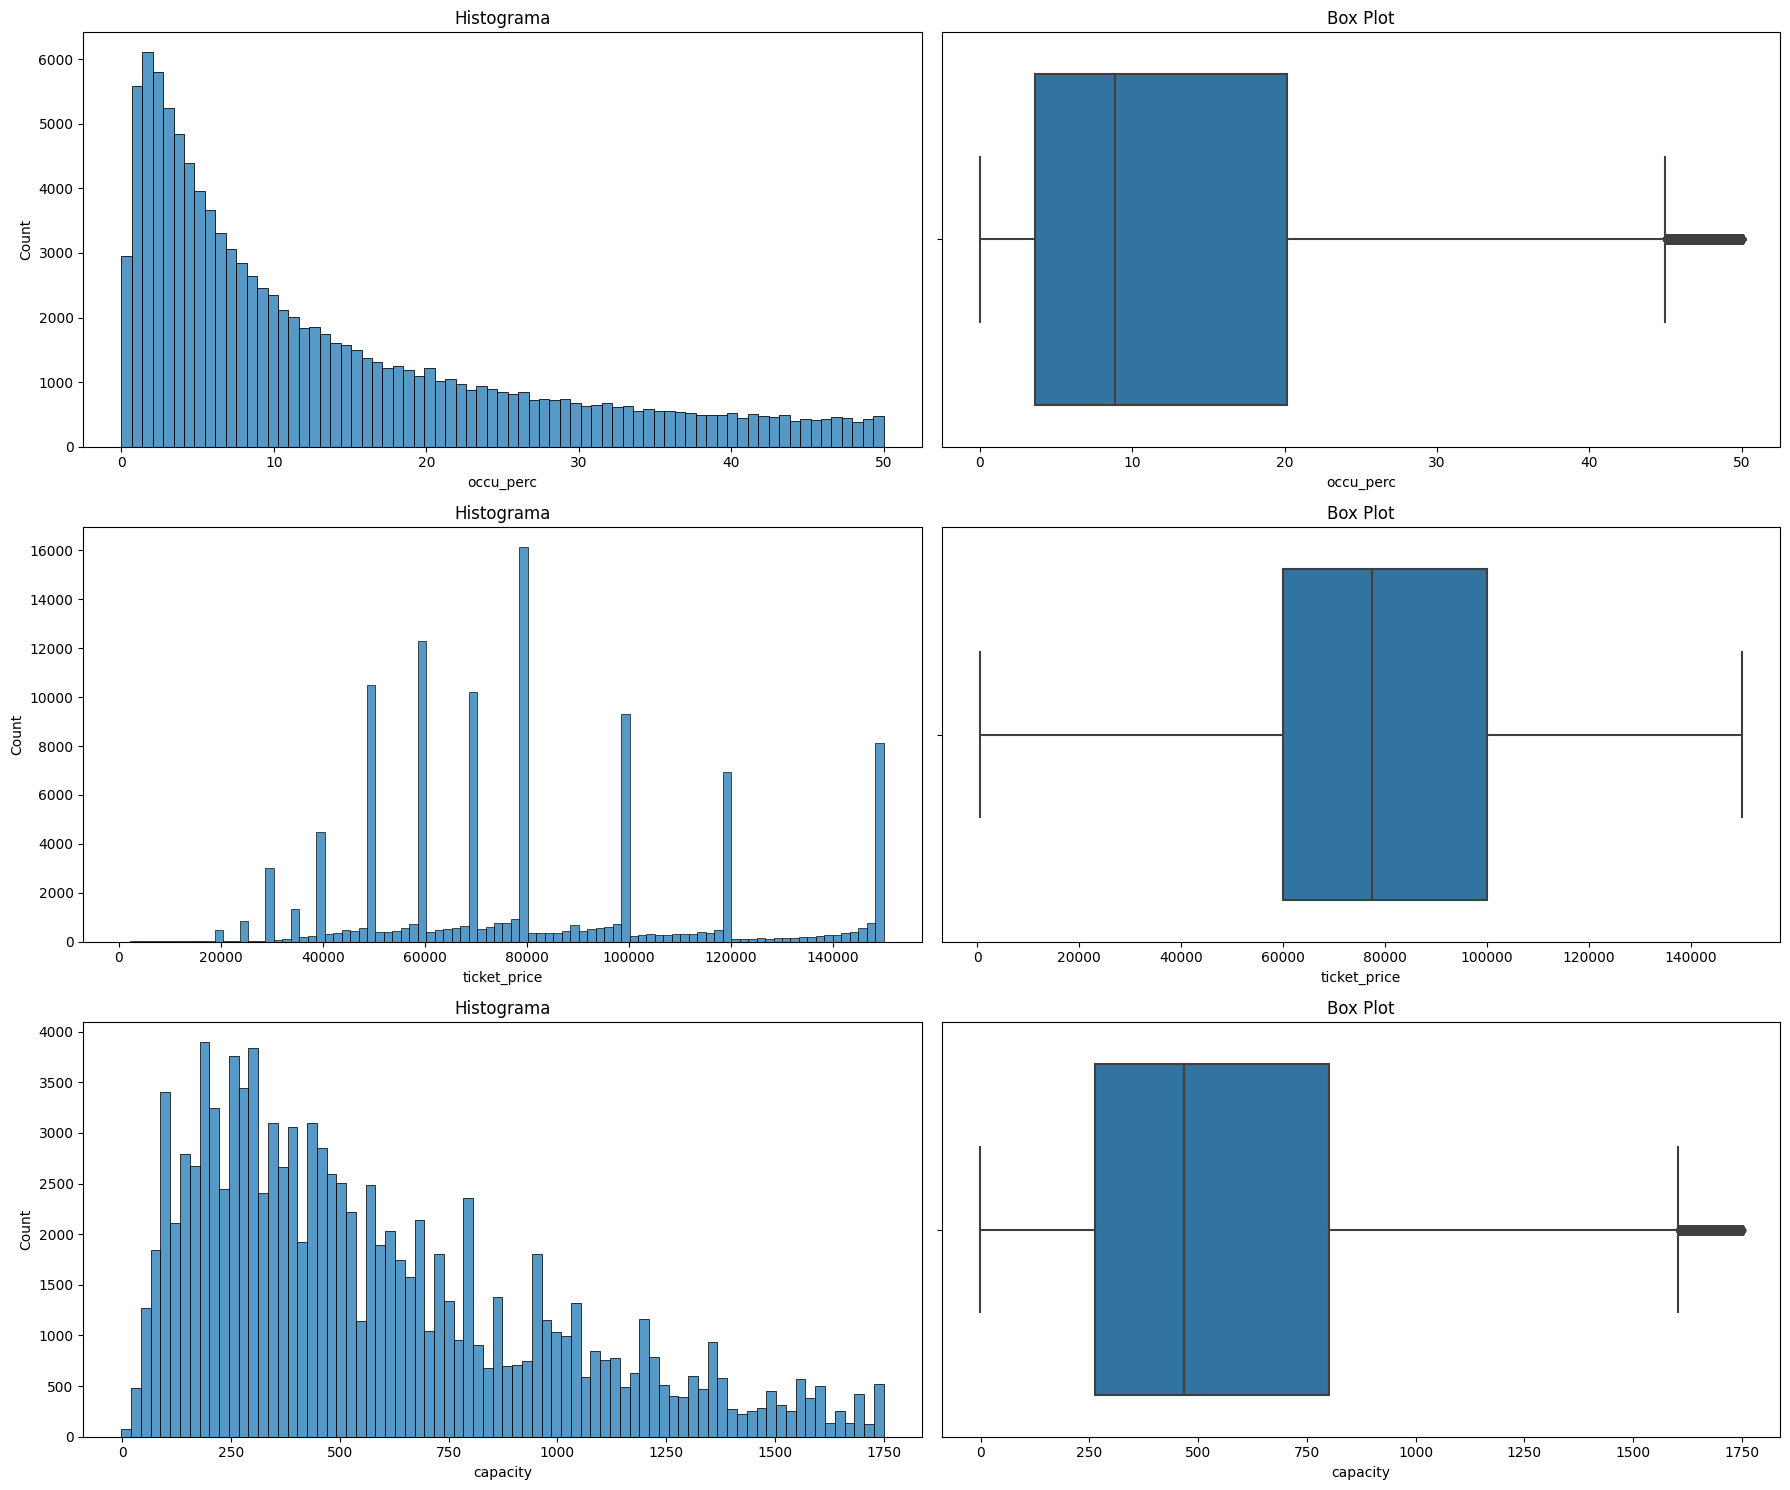

In [47]:
show_graphs(df_cine)

Función para revisar cuantos datos se eliminarián según condición aplicada al revisar datos anómalos.

In [35]:
def total_data_column(df: pd.DataFrame, column: str, quantity: int):
    return df.apply(lambda x: x[column] > quantity, axis=1).sum()

Número de registros anómalos según gráfica anterior

In [36]:
print('Porcentaje de ocupación mayor a 50:', total_data_column(df_cine, 'occu_perc', 50))
print('Precio de boleto mayor a 150000:', total_data_column(df_cine, 'ticket_price', 150000))
print('Capacidad mayor a 1750:', total_data_column(df_cine, 'capacity', 1750))

Porcentaje de ocupación mayor a 50: 17331
Precio de boleto mayor a 150000: 20
Capacidad mayor a 1750: 17659


Eliminación de datos anómalos, debido a que no ocupan un gran procentaje del dataset (Aprox 35.000 datos)

In [37]:
df_cine.drop(df_cine[df_cine['occu_perc'] > 50].index, inplace=True)
df_cine.drop(df_cine[df_cine['ticket_price'] > 150000].index, inplace=True)
df_cine.drop(df_cine[df_cine['capacity'] > 1750].index, inplace=True)

df_cine

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,date,month,quarter,day
0,1492,304,3900000,26,0,4,4.26,150000.000000,26,610.328638,2018-05-05,5,2,5
1,1492,352,3360000,42,0,5,8.08,80000.000000,42,519.801980,2018-05-05,5,2,5
2,1492,489,2560000,32,0,4,20.00,80000.000000,32,160.000000,2018-05-05,5,2,5
3,1492,429,1200000,12,0,1,11.01,100000.000000,12,108.991826,2018-05-05,5,2,5
4,1492,524,1200000,15,0,3,16.67,80000.000000,15,89.982004,2018-05-05,5,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142518,1569,489,2420000,18,1,3,24.00,134444.444444,17,75.000000,2018-11-04,11,4,4
142519,1569,495,1320000,22,0,2,3.86,60000.000000,22,569.948187,2018-11-04,11,4,4
142521,1569,524,1060000,8,0,3,9.20,132500.000000,8,86.956522,2018-11-04,11,4,4
142522,1569,529,600000,5,0,2,5.00,120000.000000,5,100.000000,2018-11-04,11,4,4


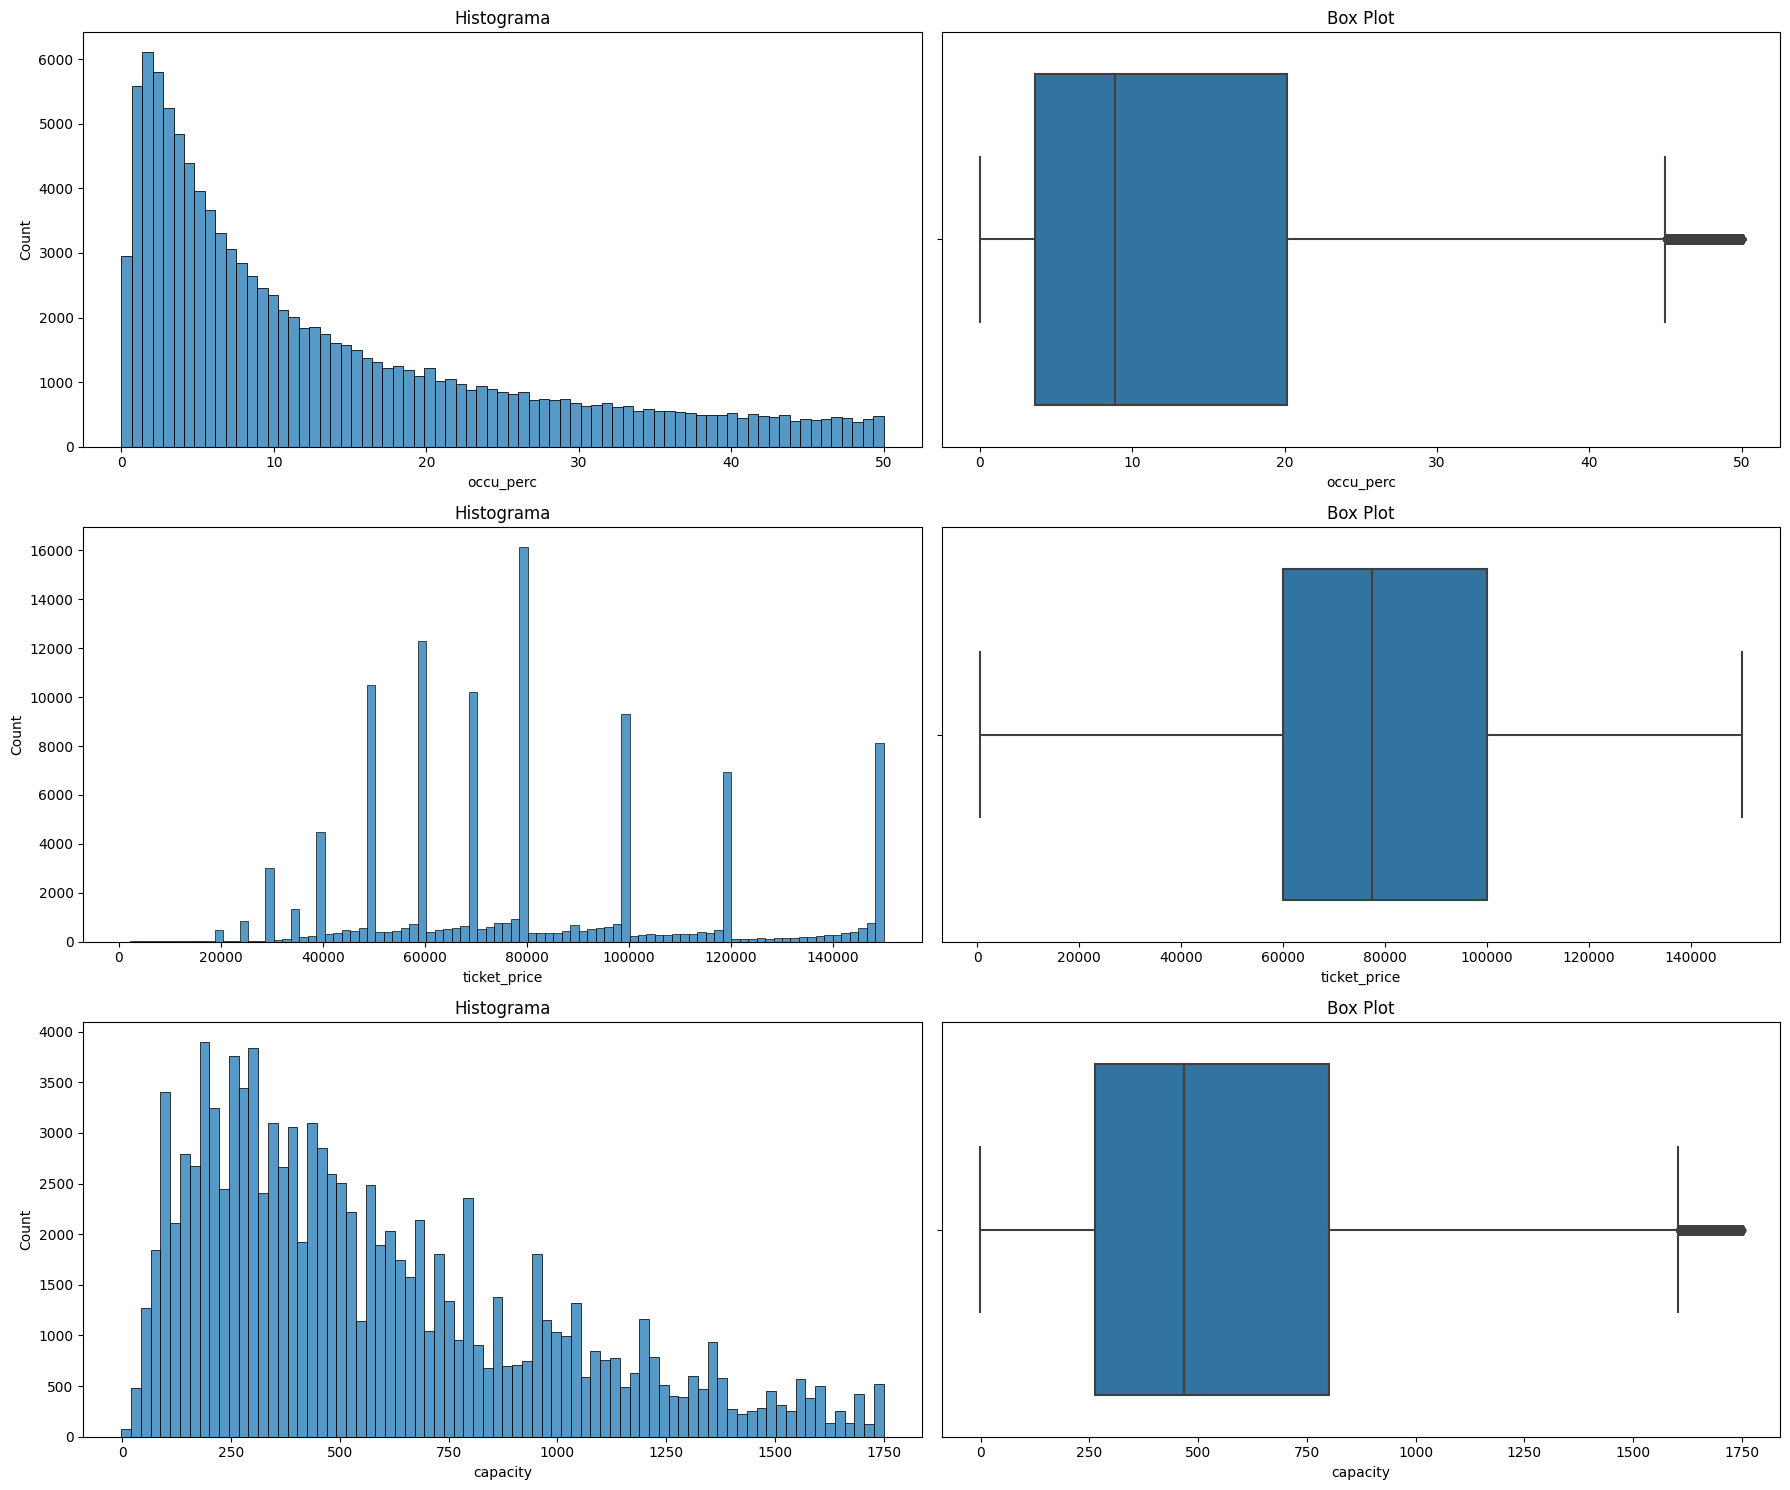

In [48]:
show_graphs(df_cine)

**Justificación:**

1. Limpieza de datos:
   - Se verifica la presencia de valores nulos en el dataset utilizando el método `isnull()` seguido de `sum()`.
   - Los datos nulos en las columnas 'occu_perc' y 'capacity' se eliminan utilizando el método `dropna()` y se establece el argumento `inplace=True` para modificar directamente el DataFrame original.
   - Se verifica nuevamente la ausencia de valores nulos para confirmar la eliminación exitosa.

<br>

2. Eliminación de datos duplicados:
   - Se eliminan los registros duplicados en el dataset utilizando el método `drop_duplicates()`, también con `inplace=True`.

<br>

3. Análisis de datos anómalos:
   - Se define la función `show_graphs()` para visualizar histogramas y diagramas de caja para las variables numéricas del DataFrame.
   - Se define la función `total_data_column()` para contar el número de registros anómalos según una condición específica.
   - Se muestran las cantidades de registros anómalos identificados para las variables 'occu_perc', 'ticket_price' y 'capacity'.

<br>

4. Eliminación de datos anómalos:
   - Se eliminan los registros anómalos mediante el uso del método `drop()` con las condiciones especificadas.
   - Se utiliza el método `drop()` en combinación con el método `index` para eliminar las filas correspondientes a los registros anómalos identificados.

<br>

5. Visualización de datos después de la preparación:
   - Se utiliza nuevamente la función `show_graphs()` para visualizar los histogramas y diagramas de caja actualizados después de la eliminación de datos anómalos.

## Total de ventas para cada uno de los cinemas.

In [39]:
cinema_sales = df_cine.groupby('cinema_code')['total_sales'].sum()

print(cinema_sales)

cinema_code
32        3400000
33      597300000
34     6488710000
35     4066600000
39     4826350000
          ...    
560      79135000
561     860230000
562     204660000
565       9680000
566       4000000
Name: total_sales, Length: 241, dtype: int64


## Gráfico para saber por día el total de ventas.

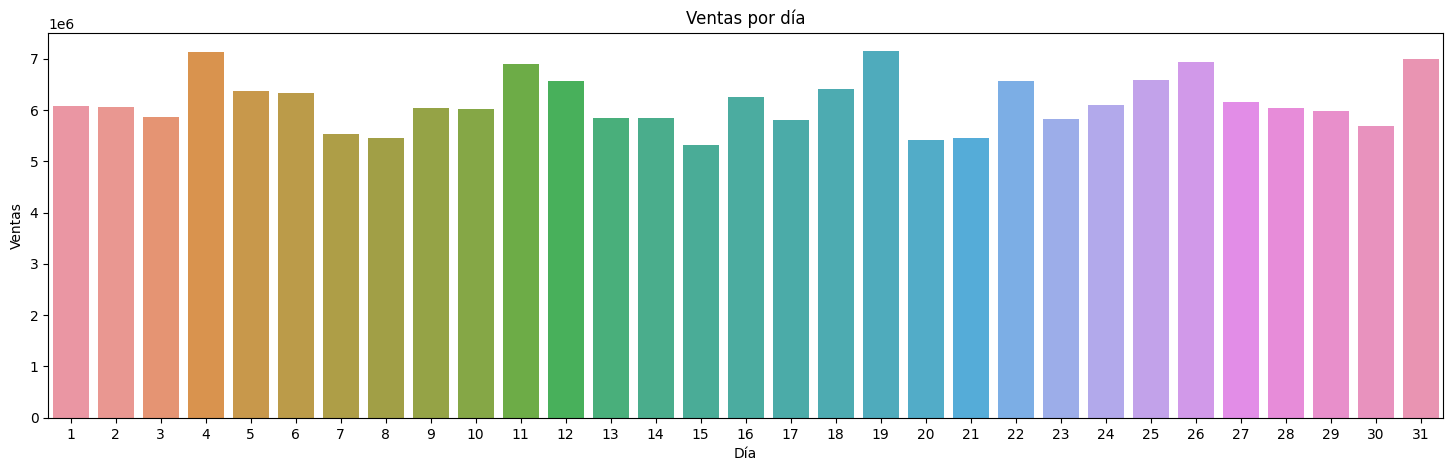

In [40]:
plt.figure(figsize=(18,5))
sns.barplot(x='day', y='total_sales', data=df_cine, errorbar=None)
plt.xlabel('Día')
plt.ylabel('Ventas')
plt.title('Ventas por día')
plt.show()

## Gráfico de barras para mostrar por película `film_code` el total de ingresos `total_sales`

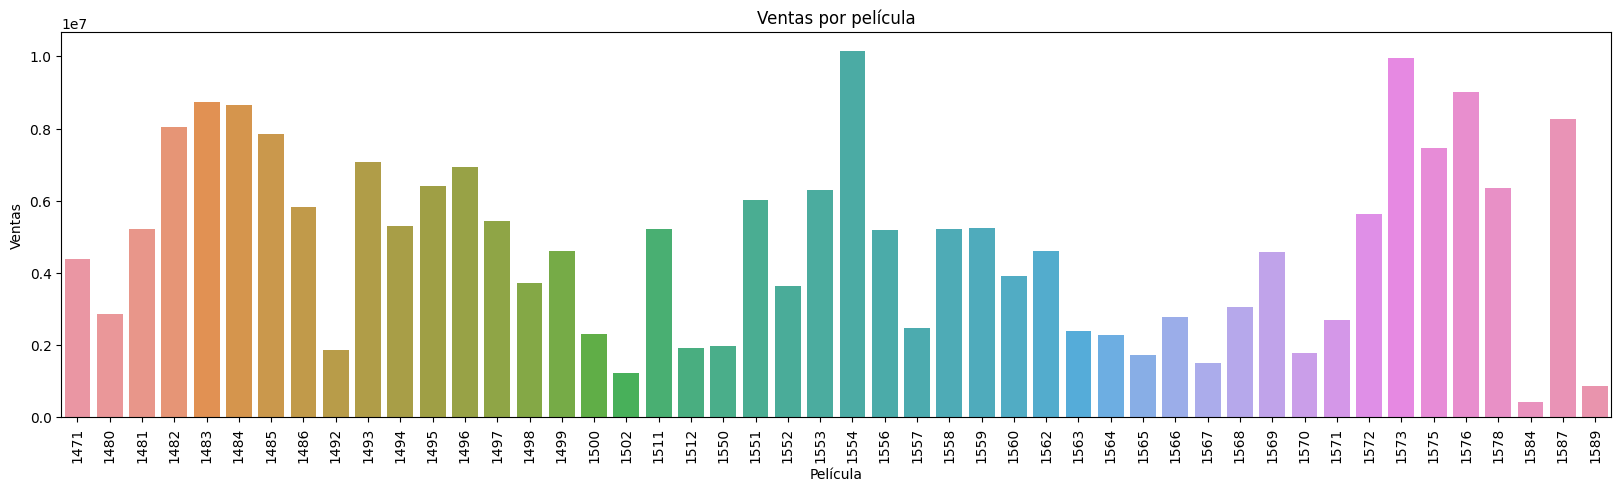

In [41]:
plt.figure(figsize=(20,5))
sns.barplot(x='film_code', y='total_sales', data=df_cine, errorbar=None)
plt.xlabel('Película')
plt.ylabel('Ventas')
plt.title('Ventas por película')
plt.xticks(rotation=90)
plt.show()

## Correlación de las variables numéricas del dataset.

**Justificación:** El código realiza la correlación entre las variables seleccionadas utilizando el método de correlación de Pearson y muestra los resultados en forma de un mapa de calor, lo que proporciona una visualización clara de las relaciones entre las variables relevantes para el análisis de ventas en un cine.

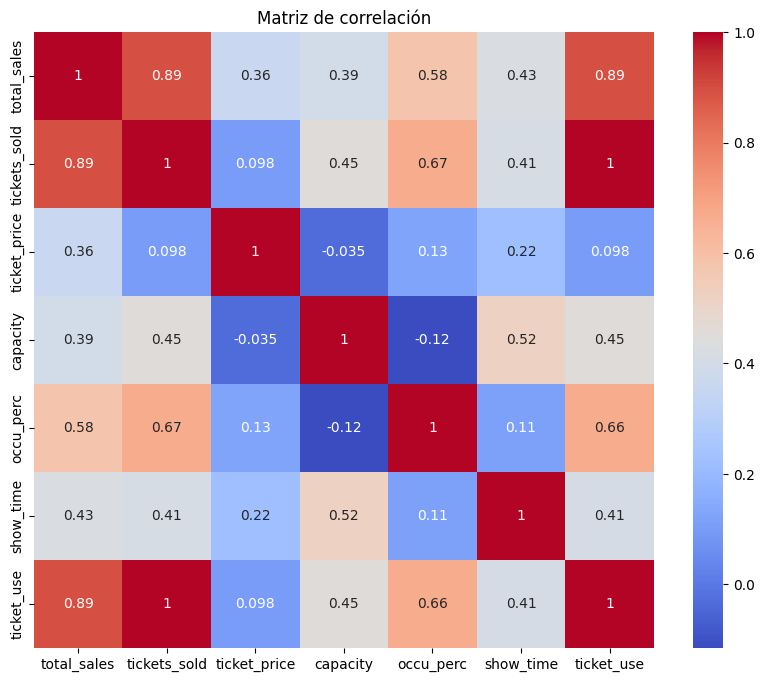

In [50]:
correlation = df_cine[['total_sales', 'tickets_sold', 'ticket_price', 'capacity', 'occu_perc', 'show_time', 'ticket_use']].corr(method='pearson')
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()

## Selección de características en el dataset

In [43]:
X = df_cine[['day', 'month', 'ticket_price', 'show_time', 'cinema_code']]
y = df_cine['total_sales']